In [19]:
import pandas as pd

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 20, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [20]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [21]:
combo_cohort = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/lifestyle/train_cohort.csv")

In [22]:
lifestyle_factors = list(pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/lifestyle_factors/data/lifestyle_processed/filtered_lifestyle_binarized.csv.gz", index_col=0).columns)

In [23]:
combo_cohort["combos"] = combo_cohort.uniq_items.str.replace("Input_", "").str.split("|")

In [24]:
data_dict = {
    "lifestyle_factors": lifestyle_factors,
    "combo_num": []
}

for lf in lifestyle_factors:
    combo_num = len(combo_cohort.loc[combo_cohort.combos.apply(lambda x: True if len(set(x).intersection(set([lf])))>0 else False)])
    data_dict["combo_num"].append(combo_num)


In [25]:
df = pd.DataFrame(data_dict).sort_values("combo_num", ascending=False)

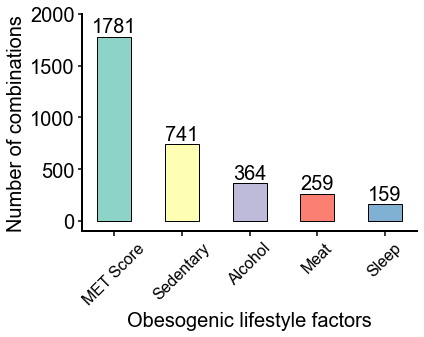

In [26]:
fig,ax = plt.subplots(1, 1, figsize=(6, 4))

plot_df = df.head()

## Combo per decile barplot
ax.bar(plot_df.lifestyle_factors, plot_df.combo_num, width=0.5, color=sns.color_palette("Set3"), edgecolor="k")
xticklabels = ["MET Score", "Sedentary", "Alcohol", "Meat", "Sleep"]
ax.set_xticks(range(len(plot_df.lifestyle_factors)), xticklabels, rotation=45, ha="center", fontsize=16)
ax.set_xlabel("Obesogenic lifestyle factors")
ax.set_ylabel("Number of combinations")
# g.bar_label([g.containers[i] for i in range])
rects = ax.patches
# Make some labels.
for rect in rects:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, f"{height}", ha="center", va="bottom"
    )
ax.set_ylim(-100, 2000)
ax.spines[['right', 'top']].set_visible(False)

In [27]:
save_file = "/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/lifestyle/figures/per_lf_combo.pdf"
save_pdf(save_file, fig)